- We will project the data into higher dimension to linearly seperate it

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt

In [52]:
X , Y = make_circles(n_samples=500,
    noise=0.05,
    random_state=6)


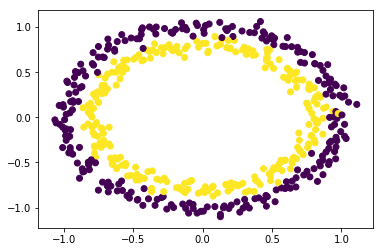

In [53]:
plt.scatter(X[:,0], X[:, 1], c= Y)

In [54]:
def phi(X):
    X1= X[:,0]
    X2= X[:,1]
    X3 = X1**2 + X2**2
    X_= np.zeros((X.shape[0], 3))
    X_[:,:-1] = X
    X_[:, -1] = X3
    return X_


In [55]:
X_ = phi(X)
print(X.shape, X_.shape)

(500, 2) (500, 3)


In [56]:
print(X[0,:])
print(X_[0,:])

[ 0.81656477 -0.03656235]
[ 0.81656477 -0.03656235  0.66811484]


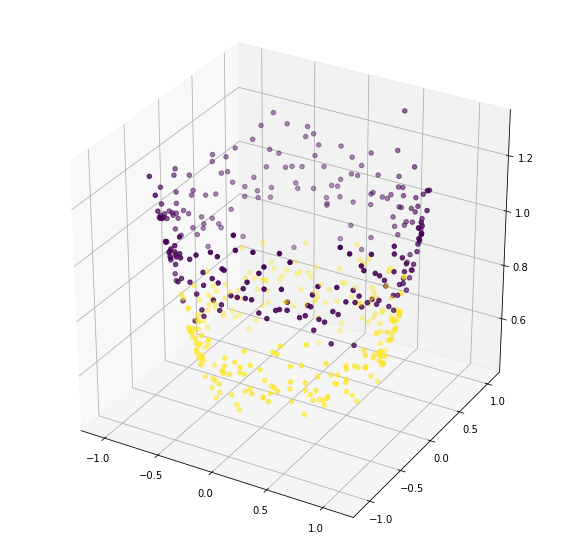

In [57]:
def plot3d(X, Y):
    fig = plt.figure(figsize= (10,10))
    ax= fig.add_subplot(111, projection= '3d')
    x1= X[:,0]
    x2= X[:,1]
    x3= X[:,2]
    ax.scatter(x1, x2,x3, c=Y, s=20,zdir='z', depthshade= True)
    plt.show()
    return ax
plot3d(X_, Y)

# Logistic Classifier

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [59]:
lr= LogisticRegression()

In [60]:
acc= cross_val_score(lr, X, Y, cv= 5).mean()# acc. on original data is bad as it's non-linear in nature
print(" the accuracy is %.4f"%(acc*100))


 the accuracy is 44.8000


C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [61]:
acc= cross_val_score(lr, X_, Y, cv= 5).mean()# acc. on 3d projected data is 98% as it's linearly seperable 
print(" the accuracy is %.4f"%(acc*100))

 the accuracy is 98.0000


C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

# Kernal based classification in SVMs
- sklearn supports following type of kernals
<ol> <li>linear </li>
    <li>RBF</li>
    <li> Polynomial </li>
    <li>Sigmoid</li>
</ol>
- they make non-linearly seperable data into linearly seperable
- they mainly help in computing *f(xi) * *f(xj) for all i and j easily where f is a tranformation
- We will use kernal in svm from sklearn

In [62]:
from sklearn import svm

In [63]:
svc= svm.SVC(kernel='linear')

In [64]:
svc.fit(X,Y)
svc.score(X,Y)

0.504

In [65]:
svc= svm.SVC(kernel='rbf')
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.98

In [66]:
svc= svm.SVC(kernel='poly')
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.568

In [68]:
svc= svm.SVC(kernel='sigmoid')
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.506

In [73]:
def customKernal(x1,x2):
    return np.square(np.dot(x1,x2.T))
svc= svm.SVC(kernel=customKernal)
svc.fit(X,Y)
svc.score(X,Y)

0.984